

# > **EXPLORATORY DATA ANALYSIS**



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the features dataset
features = pd.read_csv("features.csv")
features["Date"] = pd.to_datetime(features["Date"])  # Convert 'Date' to datetime format


In [ ]:
print(f"Shape of features.csv: {features.shape}")
features.head()


Shape of features.csv: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores = pd.read_csv("stores.csv")

In [ ]:
print(f"Shape of stores.csv: {stores.shape}")
stores.head()


Shape of stores.csv: (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
print("Types of stores:")
stores['Type'].value_counts()

Types of stores:


A    22
B    17
C     6
Name: Type, dtype: int64

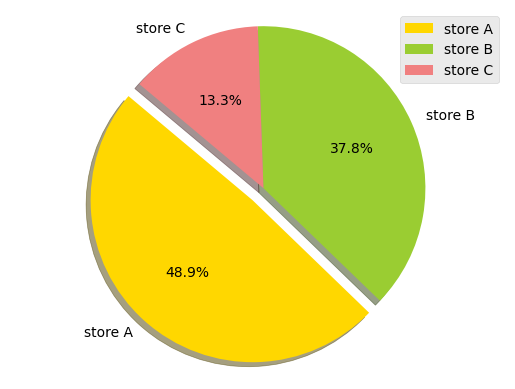

In [ ]:
#pie-chart for the visual representation of store types
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0) # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

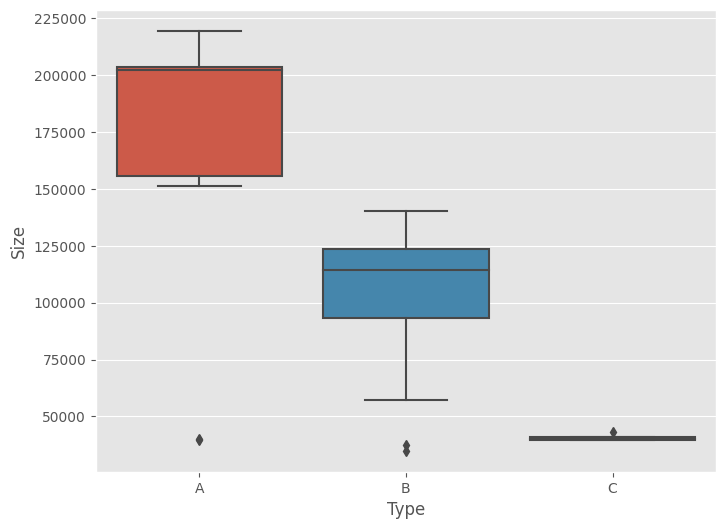

In [ ]:
#boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

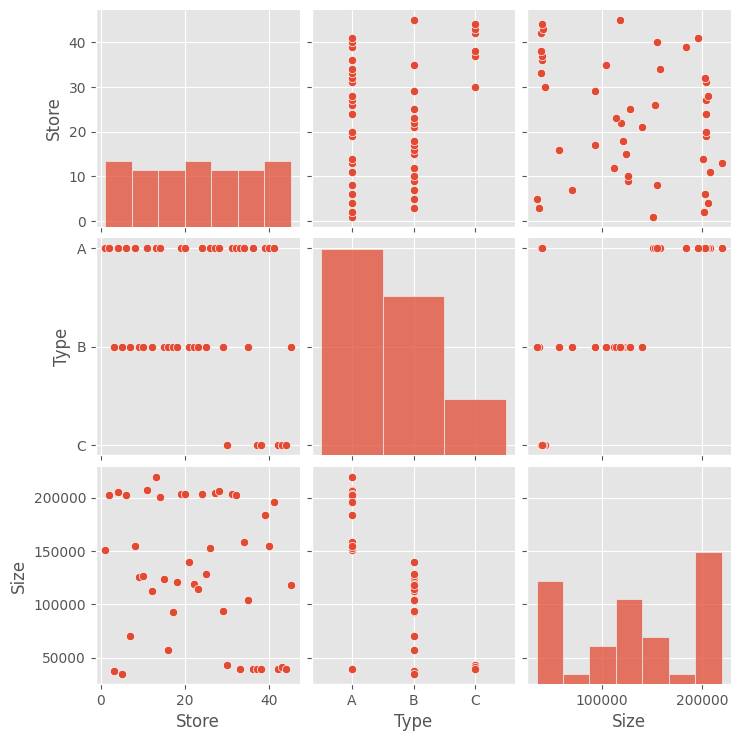

In [ ]:
#pairplot
sns.pairplot(stores, vars=['Store','Type','Size'])

#  Observations:
* There are 45 stores in total.
* There are a total of 3 types of stores: Type A, B and C.
* By boxplot and piechart, we can say that type A store is the largest store and C is the smallest.
* There is no overlapped area in size among A, B, and C.




In [ ]:
# Load the train dataset
train = pd.read_csv("train.csv")
train["Date"] = pd.to_datetime(train["Date"])  # Convert 'Date' to datetime format


In [ ]:
print(f"Shape of train.csv: {train.shape}")
train.head()


Shape of train.csv: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


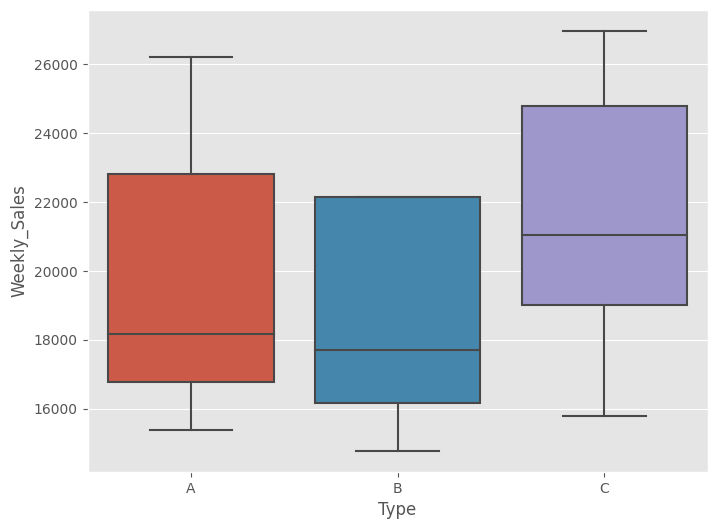

In [ ]:
#boxplot for weekly sales for different types of stores :
store_sale = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)


In [ ]:
train['IsHoliday'].value_counts()


False    391909
True      29661
Name: IsHoliday, dtype: int64

In [ ]:
objects = ('Non holidays','Holidays')
y_pos = np.arange(len(objects))

In [ ]:
y_pos

array([0, 1])

In [ ]:
print('sales on non-holiday : ',train[train['IsHoliday']==False]['Weekly_Sales'].count())
print('sales on holiday : ',train[train['IsHoliday']==True]['Weekly_Sales'].count())


sales on non-holiday :  391909
sales on holiday :  29661


In [ ]:
# Load the test dataset
test = pd.read_csv("test.csv")
test["Date"] = pd.to_datetime(test["Date"])  # Convert 'Date' to datetime format


In [ ]:
print(f"Shape of test.csv: {test.shape}")
test.head()

Shape of test.csv: (115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
# Add a holiday flag
holidays = ["2010-02-12", "2011-02-11", "2012-02-10", "2013-02-08",
            "2010-09-10", "2011-09-09", "2012-09-07", "2013-09-06",
            "2010-11-26", "2011-11-25", "2012-11-23", "2013-11-29",
            "2010-12-31", "2011-12-30", "2012-12-28", "2013-12-27"]
features["IsHoliday"] = features["Date"].apply(lambda x: x in holidays)


In [ ]:
# Merge the features and train datasets
train_merged = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")


In [ ]:
test_merged = test.merge(features, on=["Store", "Date", "IsHoliday"], how="left")

In [ ]:
train_merged = train_merged.merge(stores[["Store", "Type"]], on="Store")

In [ ]:
train_merged = train_merged.dropna()

In [ ]:
# Convert categorical columns to numerical representations using one-hot encoding
train_merged = pd.get_dummies(train_merged, columns=["Type"])

In [ ]:
# Convert the 'Date' column to numerical representation (number of days since a certain date)
start_date = pd.to_datetime("2010-02-05")  # The start date of the dataset
train_merged["Date"] = (train_merged["Date"] - start_date).dt.days

In [ ]:
# Convert the 'Weekly_Sales' column to numeric
train_merged["Weekly_Sales"] = train_merged["Weekly_Sales"].astype(float)


In [ ]:
print(train_merged.shape)
train_merged.head()

(87064, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
92,1,1,644,18689.54,False,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0,0
93,1,1,651,19050.66,False,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,1,0,0
95,1,1,665,25293.49,False,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,1,0,0
96,1,1,672,33305.92,False,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,1,0,0
97,1,1,679,45773.03,False,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,1,0,0


[]

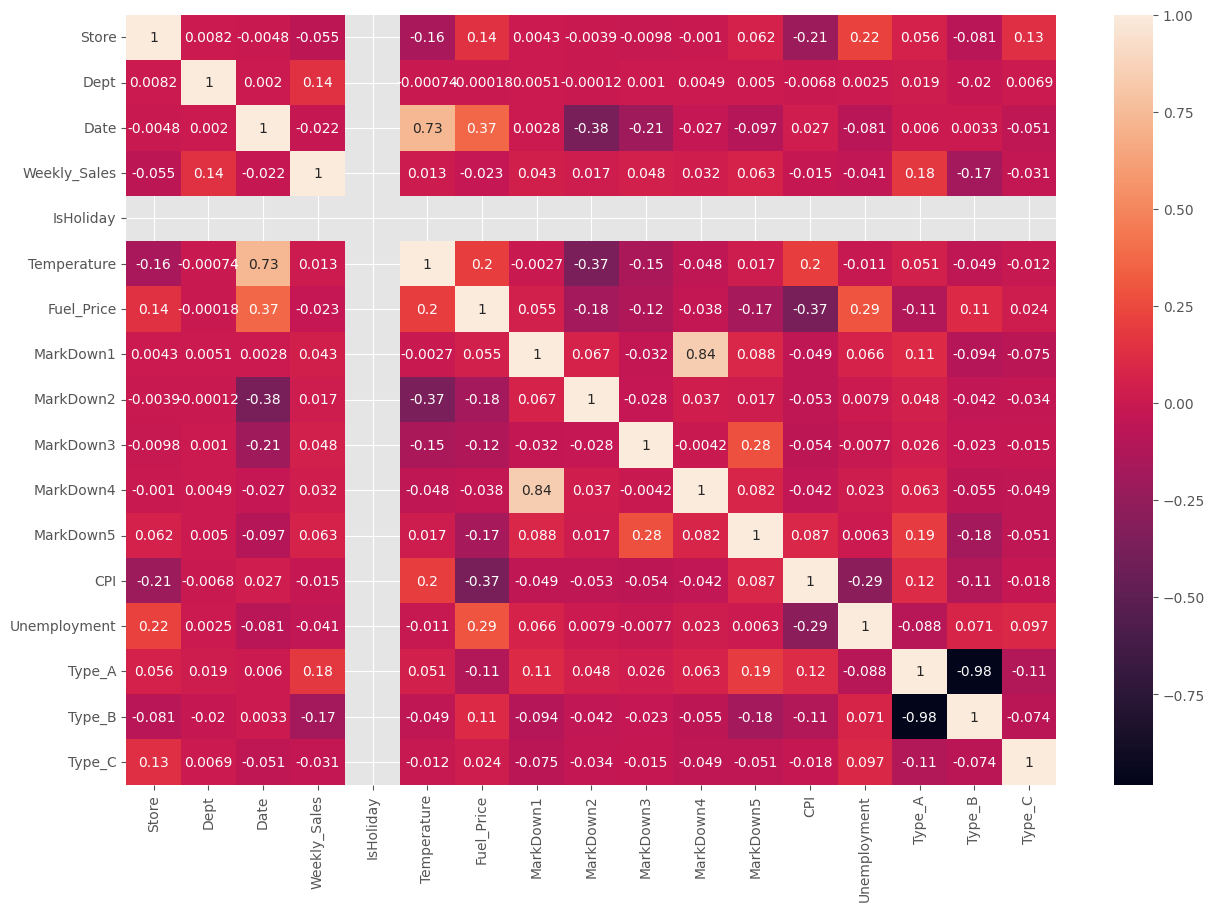

In [ ]:
corr = train_merged.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()


In [ ]:
print(test_merged.shape)
test_merged.head()


(115064, 13)


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


<ipython-input-142-804a1e5417fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = test_merged.corr()


[]

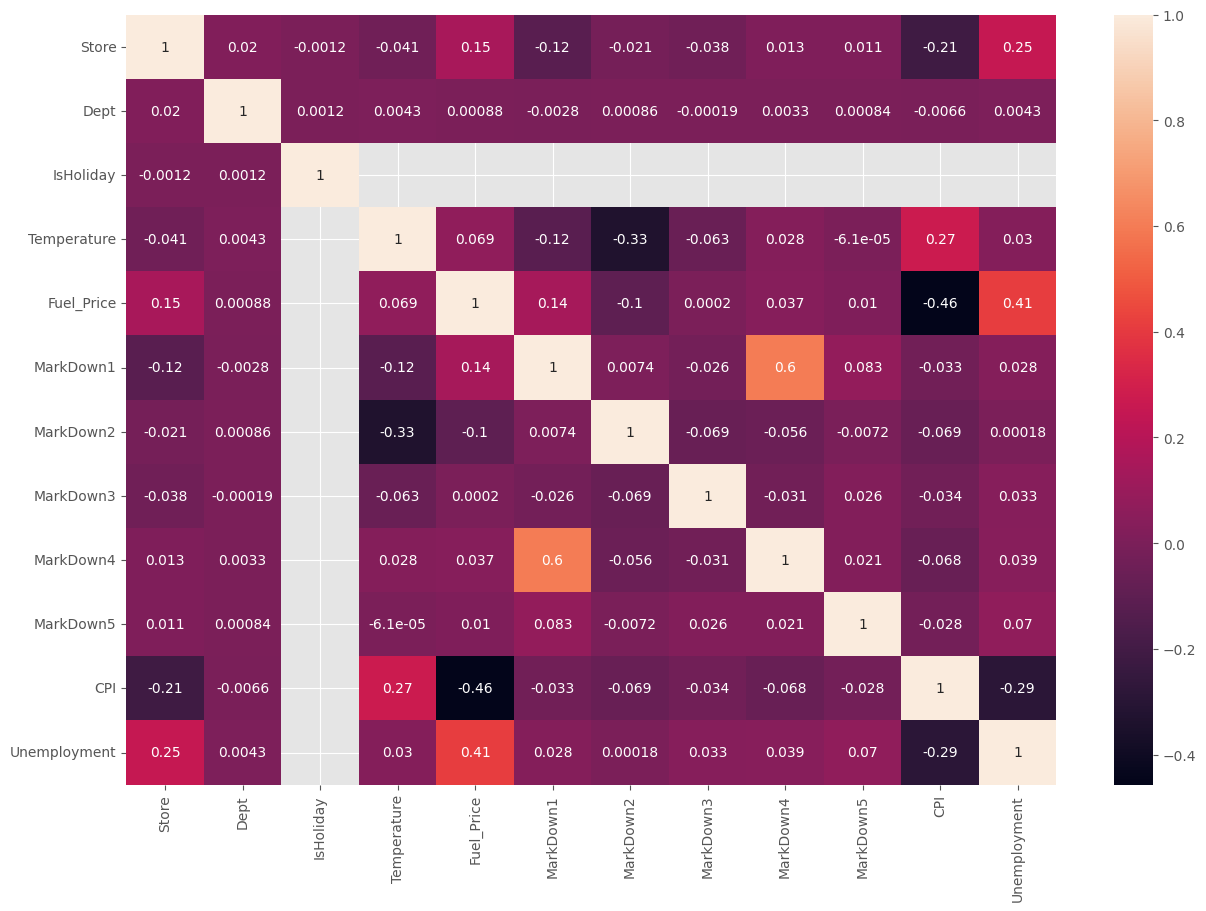

In [ ]:
corr = test_merged.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [ ]:
print(train_merged.isnull().sum())
print("*"*30)
print(test_merged.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type_A          0
Type_B          0
Type_C          0
dtype: int64
******************************
Store               0
Dept                0
Date                0
IsHoliday           0
Temperature      8928
Fuel_Price       8928
MarkDown1        9077
MarkDown2       36012
MarkDown3       18532
MarkDown4       21256
MarkDown5        8928
CPI             47090
Unemployment    47090
dtype: int64


In [ ]:
train_merged=train_merged.fillna(0)
test_merged=test_merged.fillna(0)


In [ ]:
train_merged.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
92,1,1,644,18689.54,False,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0,0
93,1,1,651,19050.66,False,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,1,0,0
95,1,1,665,25293.49,False,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,1,0,0
96,1,1,672,33305.92,False,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,1,0,0
97,1,1,679,45773.03,False,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,1,0,0


In [ ]:
print(train_merged.isnull().sum())
print("*"*50)
print(test_merged.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type_A          0
Type_B          0
Type_C          0
dtype: int64
**************************************************
Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_merged, train_merged["Weekly_Sales"], test_size=0.25)


In [ ]:
# Fit a model to the training data
model = RandomForestRegressor(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [ ]:
# Predict the sales for the test data
predictions = model.predict(X_test)

In [ ]:
print(model.score(X_test, y_test))

0.9999938274219631
